In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

import pandas as pd

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

In [3]:
df = pd.read_excel("Challenge_League_Offensive_091025.xlsx")

In [4]:
df[df["Joueur"] == "L. Nomel"]

,Joueur,Équipe,Équipe dans la période sélectionnée,Place,Âge,Valeur sur le marché,Contrat expiration,Matchs joués,Minutes jouées,Buts,...,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %"
7,L. Nomel,Stade Lausanne-Ouchy,Stade Lausanne-Ouchy,"LWF, LW",28,350000,NaN,9,757,1,...,NaN,0.36,NaN,NaN,0.12,0.12,0.0,1.07,0,0


In [5]:
from scipy import stats

In [ ]:
# Ton joueur
joueur = "L. Nomel"

# Récupérer les stats du joueur
joueur_stats = df[df["Joueur"] == joueur].iloc[0]

# Calculer les centiles pour chaque stat numérique
centiles = {}

for col in df.select_dtypes(include=['number']).columns:
    valeur_joueur = joueur_stats[col]
    # Calculer le centile (percentile rank)
    centile = stats.percentileofscore(df[col].dropna(), valeur_joueur, kind='rank')
    centiles[col] = centile

# Trier par centile décroissant et prendre le top 50
top_stats = sorted(centiles.items(), key=lambda x: x[1], reverse=True)[:50]

# Afficher sous forme de liste de listes
resultats = [[stat, round(centile, 2)] for stat, centile in top_stats]

# Affichage
for stat, centile in resultats:
    print(f"{stat}: {centile}e centile")

# Ou simplement la liste de listes
print("\nListe de listes:")
print(resultats)

# params = ["Shots on target", "Non-penalty goals", "Goal conversion rate", "Goals",
#          "Smart passes", "Ball touches in the penalty area", "Near assists",
#          "Expected Assists", "Assists", "Expected Goals", "Passes received"]
# \n
# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
# values = [99, 99, 98, 98, 97, 92, 90, 89, 87, 87, 82]

Attaques réussies par 90: 100.0e centile
Passes quasi décisives par 90: 100.0e centile
Centres en profondeur, par 90: 100.0e centile
Centres dans la surface de but par 90: 98.68e centile
Centres par 90: 97.37e centile
Centres du flanc gauche par 90: 97.37e centile
Dribbles par 90: 97.37e centile
Courses progressives par 90: 97.37e centile
Longues passes réceptionnées par 90: 97.37e centile
Minutes jouées  : 94.74e centile
Passes décisives avec tir par 90: 94.74e centile
Passes vers la surface de réparation par 90: 94.74e centile
Passes décisives: 92.11e centile
xA: 92.11e centile
Centres du flanc droit précises, %: 92.11e centile
Duels offensifs par 90: 92.11e centile
Passes par 90: 92.11e centile
Passes courtes / moyennes par 90: 92.11e centile
xA par 90: 92.11e centile
Passes judicieuses par 90: 92.11e centile
Passes intelligentes précises, %: 92.11e centile
Passes en profondeur précises, %: 92.11e centile
Réalisations en profondeur par 90: 92.11e centile
Passes progressives précises

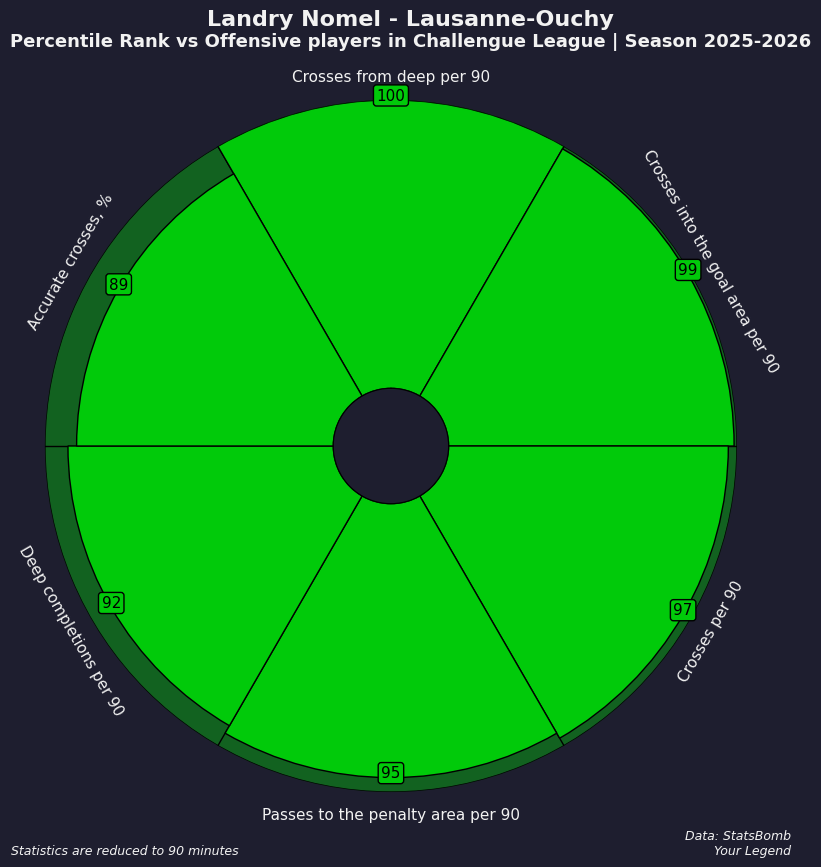

In [7]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Définir les polices (utiliser les polices par défaut si les polices personnalisées ne sont pas disponibles)
font_normal = FontProperties(family='DejaVu Sans', weight='normal')
font_bold = FontProperties(family='DejaVu Sans', weight='bold')
font_italic = FontProperties(family='DejaVu Sans', style='italic')

params = [
    "Crosses from deep per 90",
    "Crosses into the goal area per 90",
    "Crosses per 90",
    "Passes to the penalty area per 90",
    "Deep completions per 90",
    "Accurate crosses, %",
]
values = [100, 99, 97, 95, 92, 89]

# Définir les couleurs selon le percentile
# Si >= 75: vert très clair (#90EE90)
# Si < 75: vert un peu moins clair (#6BAA75)
slice_colors = []
for value in values:
    if value >= 75:
        slice_colors.append("#01ca0a")  # Vert très clair
    else:
        slice_colors.append("#4ecc54")  # Vert un peu moins clair

# Couleur du texte (noir pour une meilleure lisibilité sur fond vert)
text_colors = ["#000000"] * len(values)

# instantiate PyPizza class
baker = PyPizza(
    params=params,  # list of parameters
    background_color="#1e1e2f",  # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,  # linewidth for straight lines
    last_circle_color="#000000",  # color for last line
    last_circle_lw=1,  # linewidth of last circle
    other_circle_lw=0,  # linewidth for other circles
    inner_circle_size=20  # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,  # list of values
    figsize=(8, 8.5),  # adjust the figsize according to your need
    color_blank_space="same",  # use the same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal, va="center"
    ),  # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#F2F2F2",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.995, "Landry Nomel - Lausanne-Ouchy", size=16,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.970,
    "Percentile Rank vs Offensive players in Challengue League | Season 2025-2026",
    size=13,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

# add credits
CREDIT_1 = "Data: StatsBomb"
CREDIT_2 = "Your Legend"
fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)

fig.text(
    0.30, 0.02, f"Statistics are reduced to 90 minutes", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)


plt.tight_layout()
plt.show()

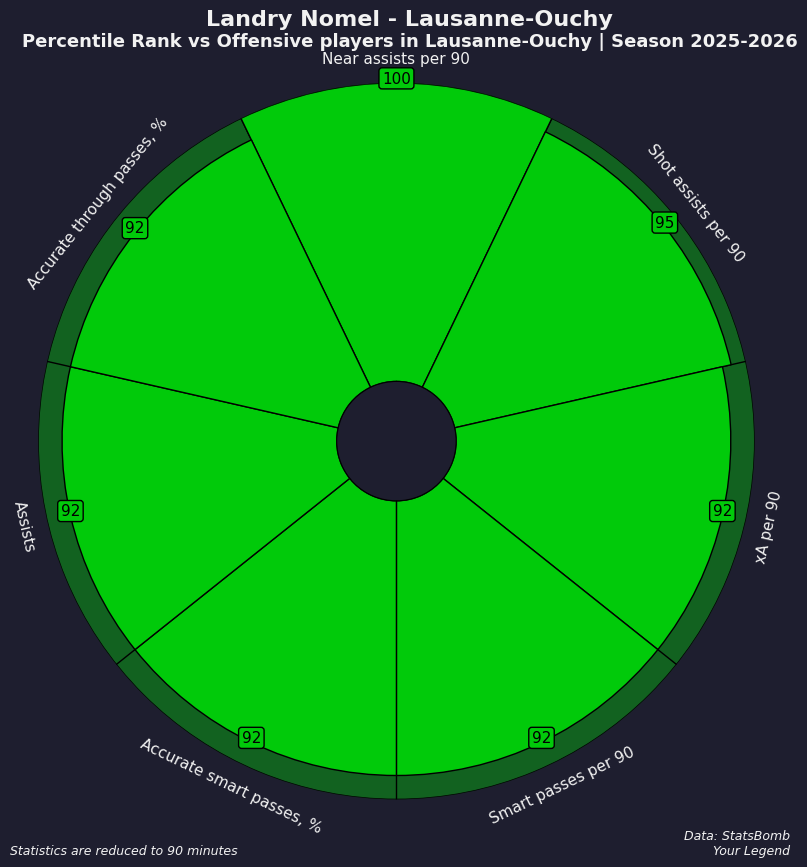

In [8]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Définir les polices (utiliser les polices par défaut si les polices personnalisées ne sont pas disponibles)
font_normal = FontProperties(family='DejaVu Sans', weight='normal')
font_bold = FontProperties(family='DejaVu Sans', weight='bold')
font_italic = FontProperties(family='DejaVu Sans', style='italic')

params = [
    "Near assists per 90",
    "Shot assists per 90",
    "xA per 90",
    "Smart passes per 90",
    "Accurate smart passes, %",
    "Assists",
    "Accurate through passes, %",
]
values = [100, 95, 92, 92, 92, 92, 92]

# Définir les couleurs selon le percentile
# Si >= 75: vert très clair (#90EE90)
# Si < 75: vert un peu moins clair (#6BAA75)
slice_colors = []
for value in values:
    if value >= 75:
        slice_colors.append("#01ca0a")  # Vert très clair
    else:
        slice_colors.append("#4ecc54")  # Vert un peu moins clair

# Couleur du texte (noir pour une meilleure lisibilité sur fond vert)
text_colors = ["#000000"] * len(values)

# instantiate PyPizza class
baker = PyPizza(
    params=params,  # list of parameters
    background_color="#1e1e2f",  # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,  # linewidth for straight lines
    last_circle_color="#000000",  # color for last line
    last_circle_lw=1,  # linewidth of last circle
    other_circle_lw=0,  # linewidth for other circles
    inner_circle_size=20  # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,  # list of values
    figsize=(8, 8.5),  # adjust the figsize according to your need
    color_blank_space="same",  # use the same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal, va="center"
    ),  # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#F2F2F2",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.995, "Landry Nomel - Lausanne-Ouchy", size=16,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.970,
    "Percentile Rank vs Offensive players in Lausanne-Ouchy | Season 2025-2026",
    size=13,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

# add credits
CREDIT_1 = "Data: StatsBomb"
CREDIT_2 = "Your Legend"
fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)

fig.text(
    0.30, 0.02, f"Statistics are reduced to 90 minutes", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)


plt.tight_layout()
plt.show()

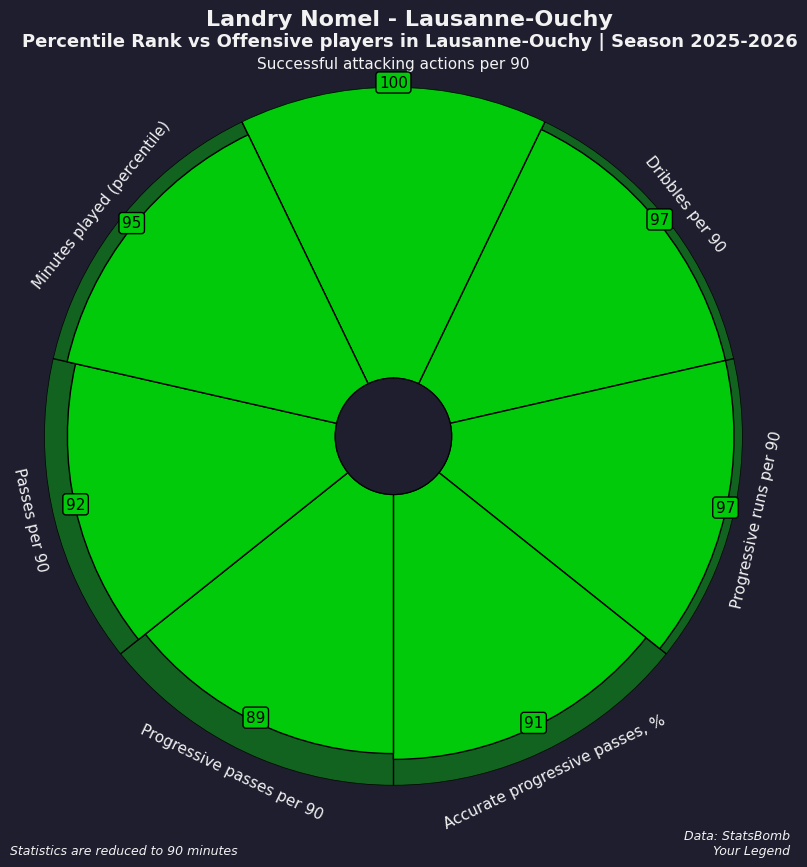

In [9]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Définir les polices (utiliser les polices par défaut si les polices personnalisées ne sont pas disponibles)
font_normal = FontProperties(family='DejaVu Sans', weight='normal')
font_bold = FontProperties(family='DejaVu Sans', weight='bold')
font_italic = FontProperties(family='DejaVu Sans', style='italic')

params = [
    "Successful attacking actions per 90",
    "Dribbles per 90",
    "Progressive runs per 90",
    "Accurate progressive passes, %",
    "Progressive passes per 90",
    "Passes per 90",
    "Minutes played (percentile)",
]
values = [100, 97, 97, 91, 89, 92, 95]


# Définir les couleurs selon le percentile
# Si >= 75: vert très clair (#90EE90)
# Si < 75: vert un peu moins clair (#6BAA75)
slice_colors = []
for value in values:
    if value >= 75:
        slice_colors.append("#01ca0a")  # Vert très clair
    else:
        slice_colors.append("#4ecc54")  # Vert un peu moins clair

# Couleur du texte (noir pour une meilleure lisibilité sur fond vert)
text_colors = ["#000000"] * len(values)

# instantiate PyPizza class
baker = PyPizza(
    params=params,  # list of parameters
    background_color="#1e1e2f",  # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,  # linewidth for straight lines
    last_circle_color="#000000",  # color for last line
    last_circle_lw=1,  # linewidth of last circle
    other_circle_lw=0,  # linewidth for other circles
    inner_circle_size=20  # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,  # list of values
    figsize=(8, 8.5),  # adjust the figsize according to your need
    color_blank_space="same",  # use the same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal, va="center"
    ),  # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#F2F2F2",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.995, "Landry Nomel - Lausanne-Ouchy", size=16,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.970,
    "Percentile Rank vs Offensive players in Lausanne-Ouchy | Season 2025-2026",
    size=13,
    ha="center", fontproperties=font_bold, color="#F2F2F2"
)

# add credits
CREDIT_1 = "Data: StatsBomb"
CREDIT_2 = "Your Legend"
fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)

fig.text(
    0.30, 0.02, f"Statistics are reduced to 90 minutes", size=9,
    fontproperties=font_italic, color="#F2F2F2",
    ha="right"
)


plt.tight_layout()
plt.show()